# A3.1 SVM y multiple testing
## Luis Enrique Garcia Gallegos
### **Matricula:** 649247
En esta actividad trabajarás con la base de datos de la que se habló en clase, que consiste de **83 muestras** y **2308 variables** de entrada, que consisten en la expresión génica estandarizada de distintos genes. La variable de salida cuenta con valores numéricos del **1** al **4** que corresponden a distintos tipos de cáncer.

Desarrolla los siguientes puntos en una *Jupyter Notebook*, tratando, dentro de lo posible, que cada punto se trabaje en una celda distinta. Los comentarios en el código siempre son bienvenidos, de preferencia, aprovecha el *markdown* para generar cuadros de descripción que ayuden al lector a comprender el trabajo realizado.

1. Importa los datos a tu ambiente de trabajo y revisa que no haya huecos. Calcula la diferencia de promedios entre las clases 2 y 4 para todos los genes, e imprime los 10 genes con la mayor diferencia de medias. Indica qué crees que esta diferencia podría implicar en términos de un estudio de inferencia.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, f_oneway
from statsmodels.stats.multitest import multipletests
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
BaseDeDatos=pd.read_csv('Khan.csv')
clase1=BaseDeDatos[BaseDeDatos['y']==1]
clase2=BaseDeDatos[BaseDeDatos['y']==2]
clase3=BaseDeDatos[BaseDeDatos['y']==3]
clase4=BaseDeDatos[BaseDeDatos['y']==4]
yBaseDeDatos=BaseDeDatos.columns.difference(['y'])
diferencia24=abs(clase2[yBaseDeDatos].mean()-clase4[yBaseDeDatos].mean())
diferenciasMedia=diferencia24.sort_values(ascending=False)
diferenciasMedia.head(10)


X187     3.323151
X509     2.906537
X2046    2.424515
X2050    2.401783
X129     2.165185
X1645    2.065460
X1319    2.045941
X1955    2.037340
X1003    2.011337
X246     1.837830
dtype: float64

Esta parte del código fue proporcionada por ChatGpt, lo que hace es buscar todos los datos que pertenezcan a la clase **2** y **4** con la finalidad de poder determinar sus promedios para cada variable, de tal forma que podemos conocer sacar las diferencias de cada variable y mostrar las primeras **10 variables** que tengan la mayor diferencia que son las que se imprimieron.

2. Calcula el `estadístico t` y el `p-value` para comparar las medias de todos los genes entre la clase 2 y la clase 4 de la base de datos. Usa la metodología de Bonferroni, de Holm, y de Benjamini-Hochberg para corregir por múltiples pruebas e indica, para cada una, qué genes tienen una expresión significativamente distinta entre las clases (maneja un control de 0.05). Te recomiendo usar la función `multipletests` de `statsmodels.stats.multitest`

In [2]:
tStats=[]
pValues=[]
genes=[]
for x in range(1, 2309):
    gen="X"+str(x)
    grupo2=clase2[gen]
    grupo4=clase4[gen]
    tStat, pVal=ttest_ind(grupo2, grupo4)
    tStats.append(tStat)
    pValues.append(pVal)
    genes.append(gen)
resultados24=pd.DataFrame({'Gen': genes, 'T-stat': tStats, 'P-value': pValues })
_, p_bonf, _, signif_bonf=multipletests(pValues, alpha=0.05, method='bonferroni')
_, p_holm, _, signif_holm=multipletests(pValues, alpha=0.05, method='holm')
_, p_bh, _, signif_bh=multipletests(pValues, alpha=0.05, method='fdr_bh')
resultados24['P_Bonferroni']=p_bonf
resultados24['Signif_Bonf']=signif_bonf
resultados24['P_Holm']=p_holm
resultados24['Signif_Holm']=signif_holm
resultados24['P_BH']=p_bh
resultados24['Signif_BH']=signif_bh
topBonf=resultados24.sort_values(by='P_Bonferroni')
print("Top 10 genes método de Bonferroni:\n", topBonf[['Gen', 'P_Bonferroni']].head(10).to_string(index=False))
topHolm=resultados24.sort_values(by='P_Holm')
print("\nTop 10 genes método de Holm:\n", topHolm[['Gen', 'P_Holm']].head(10).to_string(index=False))
topBH=resultados24.sort_values(by='P_BH')
print("\nTop 10 genes método de Benjamini-Hochberg:\n", topBH[['Gen', 'P_BH']].head(10).to_string(index=False))

Top 10 genes método de Bonferroni:
   Gen  P_Bonferroni
X1955  1.115244e-14
X1003  1.125576e-14
 X187  5.845306e-13
X2046  9.108119e-12
X2050  1.017132e-11
 X509  1.874319e-11
X1645  3.196477e-11
 X246  5.379259e-11
X1954  3.313313e-10
X1389  4.838102e-10

Top 10 genes método de Holm:
   Gen       P_Holm
X1955 1.115244e-14
X1003 1.125089e-14
 X187 5.840241e-13
X2046 9.096280e-12
X2050 1.015370e-11
 X509 1.870259e-11
X1645 3.188168e-11
 X246 5.362944e-11
X1954 3.301829e-10
X1389 4.819236e-10

Top 10 genes método de Benjamini-Hochberg:
   Gen         P_BH
X1003 5.627882e-15
X1955 5.627882e-15
 X187 1.948435e-13
X2046 2.034265e-12
X2050 2.034265e-12
 X509 3.123866e-12
X1645 4.566396e-12
 X246 6.724074e-12
X1954 3.681459e-11
X1389 4.838102e-11


Este código fue proporcionado por ChatGpt y Claude, lo que hace es analizar cada gen de las clases **2** y **4** para determinar su `T-stat` y `P-value` para poder realizar las metodología de Bonferroni, de Holm, y de Benjamini-Hochberg, las cuales son funciones que ya vienen en `statsmodels.stats.multitest` de tal forma que podemos evitar caer en falsos descubrimientos por ejemplo Bonferroni es muy bueno para evitar los falso positivos pero no los falsos negativos, Holm-Bonferroni se basa en Bonferroni pero usa más potencia estadística, en cambio Benjamini-Hochberg controla la tasa esperada de falsos descubrimientos, no el riesgo total; permitiéndole detectar más cosas que Bonferroni no podría. Si comparamos los resultados veremos que obtuvieron resultados similares y que su manera de obtener las variables más significativas son distintas.

3. Realiza un experimento similar, pero ahora comparando las medias de las **4 clases** de la base de datos. Para lograrlo, en vez de trabajar con el estadístico t, te recomiendo realizar pruebas de análisis de varianza (**ANOVA**). Dicha prueba la puedes realizar con la función `f_oneway` de `scipy.stats`, pero revisa bien cómo se deben ingresar los datos a dicha función, necesitarás primero estratificarlos por clase.

In [3]:
varX=[col for col in BaseDeDatos.columns if col.startswith('X')]
resultadosAnova=[]
for var in varX:
    valores1=clase1[var]
    valores2=clase2[var]
    valores3=clase3[var]
    valores4=clase4[var]
    anova=f_oneway(valores1, valores2, valores3, valores4)
    resultadosAnova.append({'Variable': var, 'F': anova.statistic, 'p-valor': anova.pvalue})
AnovaPD=pd.DataFrame(resultadosAnova)
AnovaPD['p-ajustado'], _, _, _=multipletests(AnovaPD['p-valor'], method='fdr_bh')
AnovaPD=AnovaPD.sort_values('p-ajustado')
print("\nTop 10 variables con ANOVA (p-ajustado < 0.05):\n", AnovaPD[AnovaPD['p-ajustado']<0.05].head(10).to_string(index=False))
candidatas=AnovaPD[AnovaPD['p-ajustado'] < 0.05]['Variable'].tolist()
print(f"Variables candidatas ANOVA con p-ajustado < 0.05: {len(candidatas)}")


Top 10 variables con ANOVA (p-ajustado < 0.05):
 Variable        F  p-valor  p-ajustado
   X2308 1.514597 0.217194       False
    X958 2.553002 0.061382       False
    X957 0.714490 0.546230       False
    X956 0.523843 0.667150       False
    X955 0.104212 0.957378       False
    X954 1.477307 0.227100       False
   X1832 0.986441 0.403575       False
    X952 1.835049 0.147565       False
    X959 3.039875 0.033795       False
    X950 1.114493 0.348310       False
Variables candidatas ANOVA con p-ajustado < 0.05: 1146


Este código fue proporcionado por ChatGpt, lo que hace es realizar una prueba ANOVA de las **4 clases** por cada variables es decir que hace **2308** anovas para las **4 clases**, de tal forma que podemos conocer el alpha de cada variable y lo que hacemos es imprimir de menor a mayor los alphas y vemos si este esta es menor a **0.05**, que es la columna `p-ajustado`, si tiene un valor `False` esto indica que no hay evidencia suficiente para afirmar que existen diferencias las clases, mientras que un `True` indica lo contrario.

4. Separa los datos en entrenamiento y prueba, construye y entrena un modelo de SVM con un kernel lineal, con un kernel polinomial de orden 3, y con un kernel radial (puedes usar los parámetros que gustes, no necesitas optimizar con validación cruzada). Para evitar que el tiempo de procesamiento sea exagerado, puedes seleccionar solamente algunas variables, partiendo de los resultados que obtuviste en los puntos anteriores. Esta no es una práctica adecuada, pues estamos cayendo en una situación de fuga de datos. Lo ideal sería que la selección de características se basara solamente en experimentos realizados con los datos de entrenamiento. Pero, en este caso, obviaremos este detalle.

In [4]:
top30Vars=AnovaPD.sort_values('p-ajustado')['Variable'].head(30).tolist()
X=BaseDeDatos[top30Vars]
y=BaseDeDatos['y']
modelos={"Lineal": SVC(kernel='linear'), "Polinomial grado 3": SVC(kernel='poly', degree=3), "Radial (RBF)": SVC(kernel='rbf')}
kf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Este código fue proporcionado por ChatGpt y basándonos en el ANOVA podremos determinar que variables son relevantes ya que según nuestro código previo nos dio que **1146 variables** son relevantes pero como tenemos **83 muestras** por lo que tenemos que tener menos variables que muestras por lo que arbitrariamente decidí usar **30 variables**, las cuales serán las que obtengan un `p-ajustado` menor a **0.05**, escogiendo el los **25 más bajo**. Entrenaremos **3 modelos** más adelante y usaremos `StratifiedKFold` para realizar validación cruzada en cada modelo, con un `random_state=42`.

5. Calcula, para los 3 modelos, las métricas que consideres importantes para comparar los desempeños. Indica qué opinas sobre los resultados, especificando si crees que uno de los kernels es mejor para esta tarea específica.


Resultados para SVM con kernel Lineal:
Accuracy promedio: 55.22%
              precision    recall  f1-score   support

           1      0.357     0.455     0.400        11
           2      0.576     0.655     0.613        29
           3      0.667     0.556     0.606        18
           4      0.571     0.480     0.522        25

    accuracy                          0.554        83
   macro avg      0.543     0.536     0.535        83
weighted avg      0.565     0.554     0.556        83



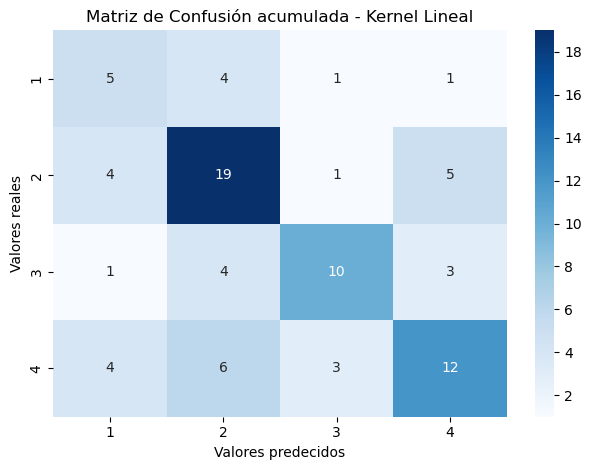


Resultados para SVM con kernel Polinomial grado 3:
Accuracy promedio: 54.19%
              precision    recall  f1-score   support

           1      0.400     0.364     0.381        11
           2      0.579     0.759     0.657        29
           3      0.533     0.444     0.485        18
           4      0.550     0.440     0.489        25

    accuracy                          0.542        83
   macro avg      0.516     0.502     0.503        83
weighted avg      0.537     0.542     0.532        83



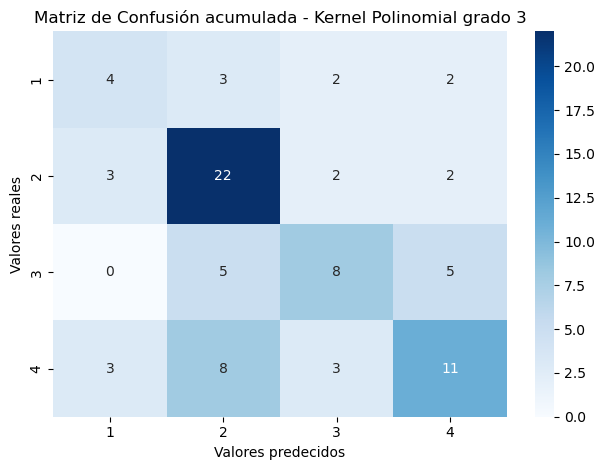


Resultados para SVM con kernel Radial (RBF):
Accuracy promedio: 48.31%
              precision    recall  f1-score   support

           1      0.000     0.000     0.000        11
           2      0.571     0.828     0.676        29
           3      0.000     0.000     0.000        18
           4      0.390     0.640     0.485        25

    accuracy                          0.482        83
   macro avg      0.240     0.367     0.290        83
weighted avg      0.317     0.482     0.382        83



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


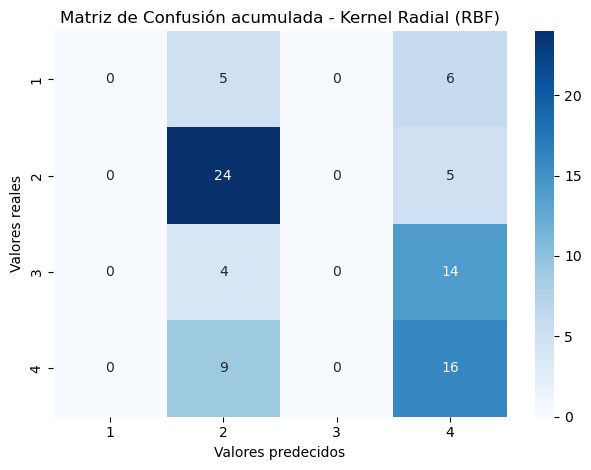

In [5]:
for nombre, modelo in modelos.items():
    print(f"\nResultados para SVM con kernel {nombre}:")
    accuracy_scores=[]
    all_y_true=[]
    all_y_pred=[]
    for train_idx, test_idx in kf.split(X, y):
        X_train, X_test=X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test=y.iloc[train_idx], y.iloc[test_idx]
        modelo.fit(X_train, y_train)
        y_pred=modelo.predict(X_test)
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)
    print(f"Accuracy promedio: {np.mean(accuracy_scores) * 100:.2f}%")
    print(classification_report(all_y_true, all_y_pred, digits=3))
    cm=confusion_matrix(all_y_true, all_y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.ylabel('Valores reales')
    plt.xlabel('Valores predecidos')
    plt.title(f'Matriz de Confusión acumulada - Kernel {nombre}')
    plt.tight_layout()
    plt.show()

Este código fue proporcionado por ChatGpt, lo que podemos visualizar es que los **3 modelos** tienen un accuracy muy bajo siendo el más alto el **modelo 1** siendo del $55%$, el cual tiene un kernel lineal y el **modelo 2** con un kernel polinomial de grado 3 con un $54$ y el **modelo 3** con un kernel rbf con un $48%$, observando las matrices de confusión vemos que los **3 modelos** tienden a decir que se pertenece a la clase **2** o **4**. Con esto datos nos damos cuenta que en general los **3 modelos** no son los mejores para predecir las **4 clases**, lo mejor seria tener más muestras o ejecutar otros modelos que mejor se adapten a estos datos.

**Firma de Honor:** Doy mi palabra que he realizado esta actividad con integridad académica